In [2]:
# import all necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [7]:
# reshape x_train and x_test
x_train = x_train / 255.0, 
x_test = x_test / 255.0

In [8]:
# model building
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [9]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# model compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# model fitting
model.fit(x_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 15s 4ms/step - loss: 0.2817 - accuracy: 0.9199 - val_loss: 0.1536 - val_accuracy: 0.9552
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1252 - accuracy: 0.9630 - val_loss: 0.1170 - val_accuracy: 0.9658
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9737 - val_loss: 0.0961 - val_accuracy: 0.9705
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0897 - val_accuracy: 0.9719
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0898 - val_accuracy: 0.9722
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.0881 - val_accuracy: 0.9727
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.0872 - val_accuracy

In [12]:
# model evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9759


[0.08258064091205597, 0.9758999943733215]

In [13]:
# model predictions
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]

In [15]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
print(cm)

tf.Tensor(
[[ 971    0    0    2    0    3    2    1    0    1]
 [   0 1121    5    2    0    0    3    2    2    0]
 [   4    2 1008    6    1    0    2    6    3    0]
 [   0    0    6  990    0    1    0    5    3    5]
 [   2    0    6    1  954    1    3    5    2    8]
 [   2    0    0   18    1  862    4    0    5    0]
 [   2    3    3    1    3    2  944    0    0    0]
 [   2    4    7    3    0    0    0 1007    0    5]
 [   3    0    6   13    4    3    5    4  933    3]
 [   3    5    1    6   11    4    0    6    4  969]], shape=(10, 10), dtype=int32)


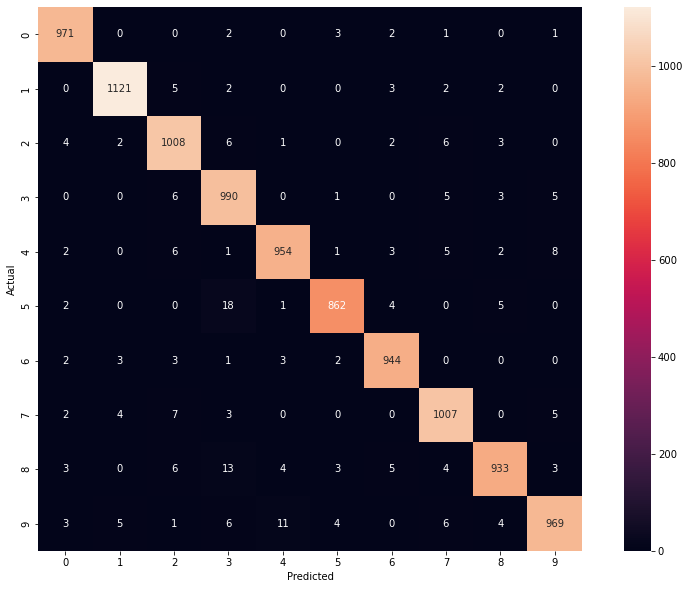

In [16]:
# plot confusion matrix
plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()